## DANA 2021
## Stock to flow and macroeconomic indicators for the Bitcoin price

### Ignacio

In [1]:
## import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import seaborn as sns
sns.set_theme()

In [2]:
from datetime import datetime, timedelta

In [3]:
## set plotting paramenters as default for the rest of the notebook
plt.rcParams["figure.figsize"] = [10,4]
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rcParams.update({'legend.fontsize': 11})
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'font.size': 15})

## 0. Load data


In [4]:
import os

In [5]:
## load data
name1 = "BTC.csv"
name2 = "BTCs2f.csv"
path0 = ""
path_here ="./"
path1 = os.path.join(path_here, path0, name1)
path2 = os.path.join(path_here, path0, name2)

try:
    btc_load = pd.read_csv(path1)
    s2f_load = pd.read_csv(path2)
except:
    %run BTC_data_build.py
    
    btc_load = pd.read_csv(path1)
    s2f_load = pd.read_csv(path2)
    
    
## convert to timestamp
def to_timestamp(x, cc="Date"):
    xdate = [datetime.strptime(dd, "%Y-%m-%d") for dd in x[cc]]
    x[cc] = xdate
    return x
    
btc = to_timestamp(btc_load)
s2f = to_timestamp(s2f_load)

## 1. Introduction
### 1.a) Scarcity in Bitcoin
Scarcity is a feature in assets that make its value time-resistant.

In [6]:
## fetch the Bitcoin Bitstamp price data
#api.dataset

## 5. Stock-to-Flow
Genesis block produced in "2009-3-1" and thereafter there is a halving event every four years where the amount of Bitcoins being mined is cut by one half its previous cycle.

Bitcoin maximum supply is 21 million and there is no chance in extracting more.

The last Bitoin will be mined in "2140"

<AxesSubplot:xlabel='Date', ylabel='BTC_stock'>

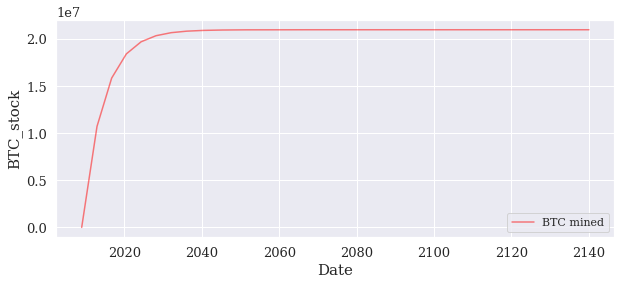

In [7]:
sns.lineplot(data=s2f, x="Date", y="BTC_stock", color="red", label="BTC mined", alpha=0.5)

[None]

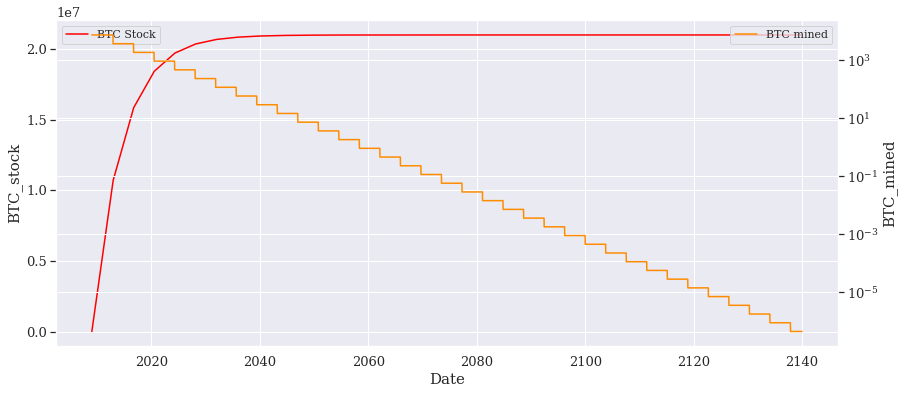

In [8]:
## Bitcoins mined and Bitcoins in stock
fig0, ax1 = plt.subplots(figsize=(14,6))
sns.lineplot(data=s2f, x="Date", y="BTC_stock", label="BTC Stock", color="red")

ax2 = ax1.twinx()
sns.lineplot(data=s2f, x="Date", y="BTC_mined", label="BTC mined", color="darkorange")
ax2.set(yscale="log")

## savefig
##plt.savefig("Bitcoin_produced.png", dpi=300)

### Calculation of the S2F model
To compute the Stock-to-Flow for Bitcoin we make use of the simple ratio of the Stock of the asset circulating in the market and the supply

\begin{align*}
\text{SF} = \frac{\text{stock}}{\text{flow}}
\end{align*}

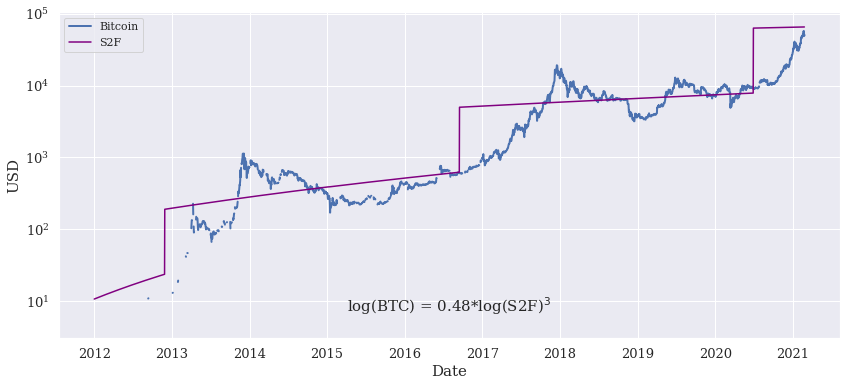

In [9]:
## S2F
fig4, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(btc["Date"], btc["Close"], label="Bitcoin", lw=2)


#ax2 = ax1.twinx()
ax1.plot(btc["Date"]+timedelta(days=0), 0.4*btc["S2F"]**3, color="purple", label="S2F")
ax1.set(ylabel="USD", xlabel="Date", yscale="log")

## box and equation
ax1.text(0.5, 0.1, r'log(BTC) = 0.48*log(S2F)$^3$', horizontalalignment='center',
     verticalalignment='center',
     transform=ax1.transAxes)

ax1.legend()

## save
##plt.savefig("Bitcoin_S2F.png", dpi=300)

## 2.  Pi cycle
We compute the $\pi$-cycle based on a long and short moving averages (MAs). The condition for the choice of the daily range for the MAs a one combination which ratio approximates to $\pi$, this is

\begin{align*}
\frac{\text{MA}^*_{\text{long}}}{\text{MA}_{\text{short}}} = \frac{\text{MA}^*(x, \tau=350)}{\text{MA}(x, \tau=111)} \approx \pi \\
\text{MA}(x, \tau) = \left(\text{MA}_1(x_1, \tau),\; \text{MA}_2(x_2, \tau),\; \ldots,\; \text{MA}_n(x_n, \tau) \right)
\end{align*}

where $\text{MA}$ is the simple moving average function for the price $x$ and price lag $\tau$. The MA at the $i$-th time point is computed as

\begin{align*}
\text{MA}_i(x, \tau) = \frac{1}{\tau}\sum_{k=-\tau}^{i}x_i
\end{align*}

In [10]:
## calcuate pi cycle 350
def pi_cycle(dat, cc="Close"):
    x = dat[cc]
    lng = 350
    srt = 111
    
    L, S = [np.NaN]*lng, [np.NaN]*srt
    
    ## calculate short and long cycles
    for ll in range(len(x[lng:])):
        li = np.sum(x[ll:ll+lng])
        L.append(li)
        
    for ss in range(len(x[srt:])):
        si = np.sum(x[ss:ss+srt])
        S.append(si)
        
    start = 400
    Laux = [np.NaN]*start
    Saux = [np.NaN]*start
    
    L = Laux+L[start:]
    S = Saux+S[start:]
    
    return np.array(L)*2/lng, np.array(S)/srt

In [11]:
## compute daily pi cylce 350
L, S = pi_cycle(btc)
btc["Long_Pi"] = L
btc["Short_Pi"] = S

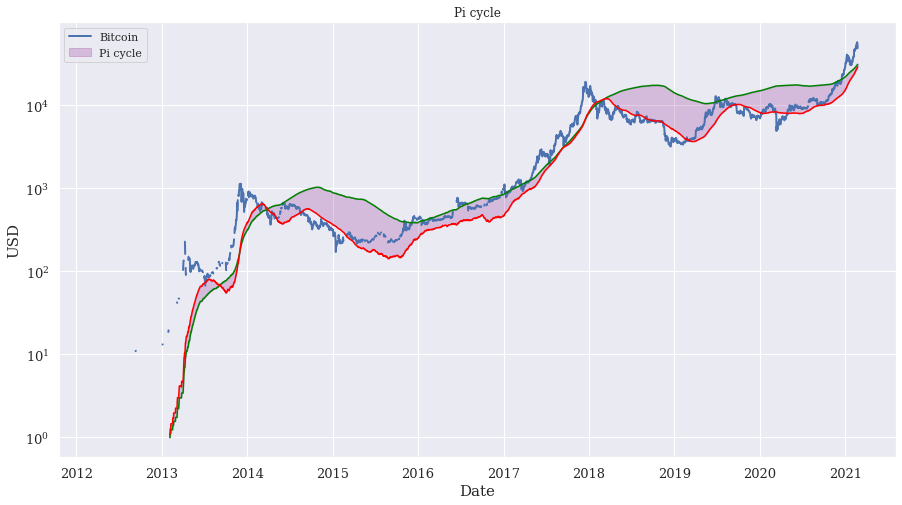

In [12]:
## seaborn plot
i0 = 0
f0 = -1

fig1, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=btc[i0:f0], y="Close", x="Date", label="Bitcoin", lw=2)
sns.lineplot(data=btc[i0:f0], y="Long_Pi", x="Date", color="green")
sns.lineplot(data=btc[i0:f0], y="Short_Pi", x="Date", color="red")
plt.fill_between(btc["Date"][i0+400:f0], btc["Long_Pi"][i0+400:f0], btc["Short_Pi"][i0+400:f0], color="purple", alpha=0.2, label="Pi cycle")
ax.set(yscale="log", ylabel="USD")
ax.set_title("Pi cycle")
ax.legend()

##plt.savefig("Fig01.png", dpi=300)

In [13]:
## update data with Pi-cycle
btc.to_csv("BTC.csv")

## 3. Price dynamics

In [14]:
## calculate price percentage-change
def price_percentage_change(x, O="Open", C="Close"):
    xOpen = np.array(x[O])
    xClose = np.array(x[C])
    return (xClose/xOpen - 1)

In [15]:
btc["Percentage"] = price_percentage_change(btc)

In [16]:
## price velocity and acceleration

def _dynamics_(dat, cc="Percentage"):
    xi = dat[cc]
    v = [np.nan]
    a = [np.nan]
    
    v += list(np.diff(xi))
    a += list(np.diff(v))
    
    return np.array(v), np.array(a)

In [17]:
## compute velocity and acceleration
v, a = _dynamics_(btc)
btc["Velocity"] = v
btc["Acceleration"] = a


## magnitude
btc["V2"] = v*v
btc["A2"] = a*a

In [18]:
btc.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Date,Open,High,Low,Close,Volume,SP500,S2F,BTC_stock,Long_Pi,Short_Pi,Percentage,Velocity,Acceleration,V2,A2
0,0,0,0,2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2.997260,8.181624e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,8.189103e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,2012-01-03,NaN,NaN,NaN,NaN,NaN,1277.060059,3.002740,8.196581e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,3,2012-01-04,NaN,NaN,NaN,NaN,NaN,1277.300049,3.005479,8.204060e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,2012-01-05,NaN,NaN,NaN,NaN,NaN,1281.060059,3.008219,8.211538e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Velocity')

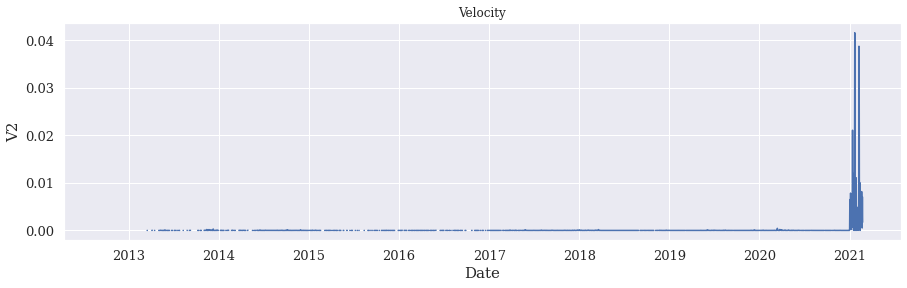

In [19]:
## plot velocity
i0 = 0
f0 = -1

fig2, ax = plt.subplots(figsize=(15,4))
#sns.lineplot(data=Xday[i0:f0], y="Close", x="Date")
#ax.set(yscale="log")
sns.lineplot(data=btc[i0:f0], y="V2", x="Date")
ax.set_title("Velocity")

Text(0.5, 1.0, 'Acceleration')

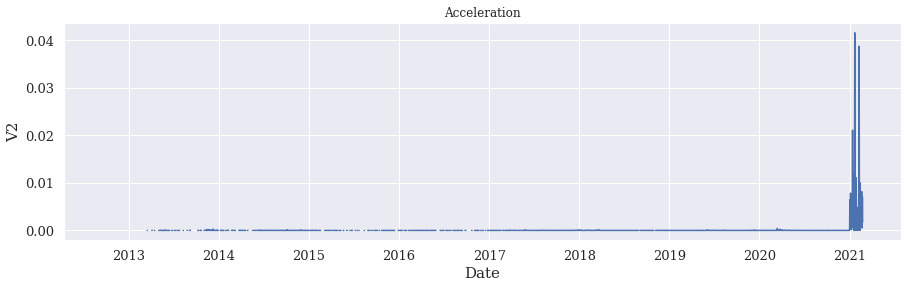

In [20]:
## plot velocity
i0 = 0
f0 = -1

fig2, ax = plt.subplots(figsize=(15,4))
#sns.lineplot(data=Xday[i0:f0], y="Close", x="Date")
#ax.set(yscale="log")
sns.lineplot(data=btc[i0:f0], y="V2", x="Date")
ax.set_title("Acceleration")

Text(0.5, 1.0, 'Price percentage change')

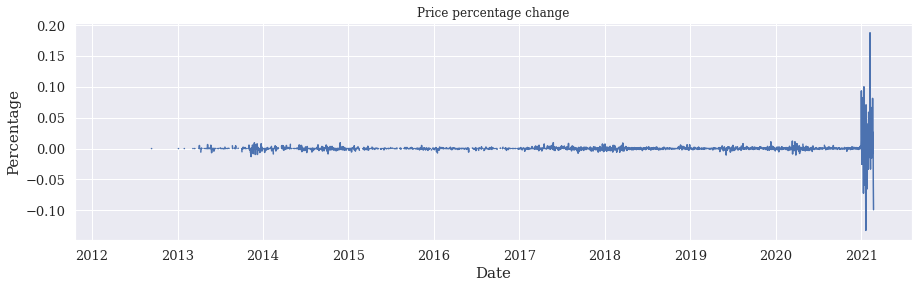

In [21]:
## plot percentage
i0 = 0
f0 = -1

fig3, ax = plt.subplots(figsize=(15,4))
#sns.lineplot(data=Xday[i0:f0], y="Close", x="Date")
#ax.set(yscale="log")
sns.lineplot(data=btc[i0:f0], y="Percentage", x="Date")
ax.set_title("Price percentage change")

1.0

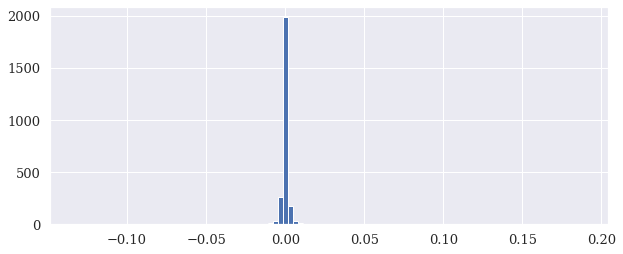

In [22]:
plt.hist(btc["Percentage"], bins=100)[0][0]

## 4 . S&P500

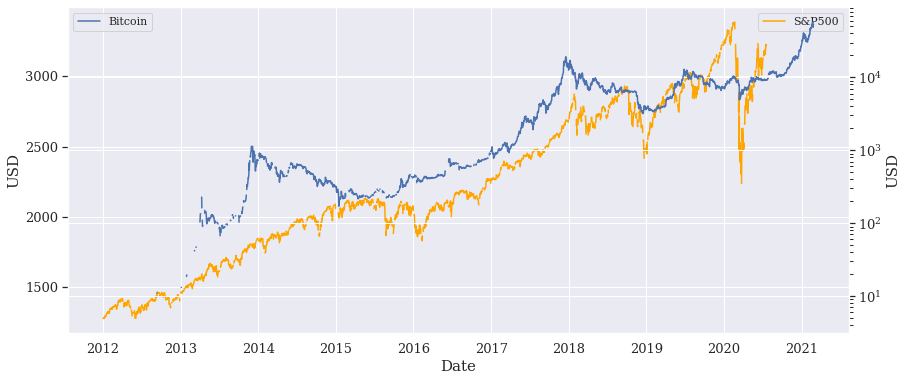

In [23]:
fig_sp, ax1 = plt.subplots(figsize=(14,6))
#sns.lineplot(data=Xday, x="Date", y="SP500", label="S\&P500")
ax1.plot(btc["Date"], btc["SP500"], label=r"S&P500", color="orange")
ax1.set(xlabel="Date", ylabel="USD")


ax2 = ax1.twinx()
ax2.plot(btc["Date"], btc["Close"], label="Bitcoin")
ax2.set_yscale("log")
ax2.set(ylabel="USD")

ax1.legend()
ax2.legend()

## Savefig
##plt.savefig("BTC_SP500.png", dpi=300)